# SOK-1006 Mikro
## Seminar 4
### Oppgave 1

In [112]:
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [113]:
N,K,X=sp.symbols('N K X', real=True, positive=True)

In [114]:
def x(N,K):
    return (N**.5)*(K**.5)
x(N,K)

K**0.5*N**0.5

### deloppgave a)

In [115]:
#kostnad på kort sikt
def C_s(N,K):
    return 350*N+(500*K)+10000
C_s(N,K)

500*K + 350*N + 10000

In [116]:
N_sol=sp.solve (x(N,K)-X,N)[0]
N_sol

X**2/K

In [117]:
C_s_K=C_s(N_sol,K)
C_s_K

500*K + 10000 + 350*X**2/K

In [118]:
C_s_fn=sp.lambdify(
    (X,K), 
    C_s_K
)
C_s_fn(X,K)

500*K + 10000 + 350*X**2/K

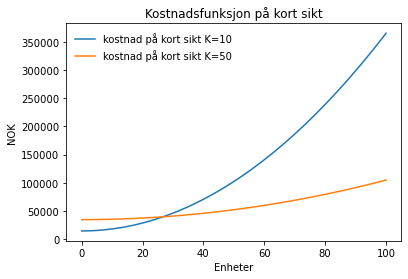

In [119]:
x_num=np.linspace (0.01,100,100)
plt.plot(x_num,C_s_fn(x_num,10), label='kostnad på kort sikt K=10')
plt.plot(x_num,C_s_fn(x_num,50), label='kostnad på kort sikt K=50')
plt.legend (loc='upper left', frameon=False)
plt.xlabel('Enheter')
plt.ylabel('NOK')

plt.title('Kostnadsfunksjon på kort sikt')

plt.show()

### deloppgave b)

In [120]:
def AC_tot(X,K):
    return C_s_fn(X,K)/X
def AC_var(X,K):
    return (C_s_fn(X,K)-10000)/X
def MC(X,K):
    return sp.diff(C_s_fn(X,K),X)
display(AC_tot(X,K))
display (AC_var(X,K))
display(MC(X,K))

(500*K + 10000 + 350*X**2/K)/X

(500*K + 350*X**2/K)/X

700*X/K

In [121]:
MC_fn=sp.lambdify((X,K), MC(X,K))
MC_fn(X,K)

700*X/K

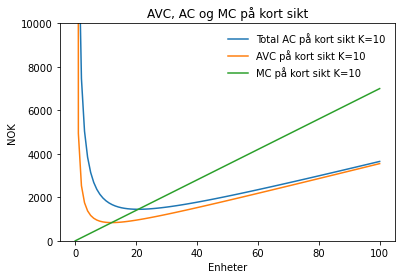

In [122]:
plt.plot(x_num,AC_tot(x_num,10), label='Total AC på kort sikt K=10')
plt.plot(x_num,AC_var(x_num,10), label='AVC på kort sikt K=10')
plt.plot(x_num,MC_fn(x_num,10), label='MC på kort sikt K=10')
plt.legend (loc='upper right', frameon=False)
plt.xlabel('Enheter')
plt.ylabel('NOK')


plt.ylim(0,10000)
plt.title('AVC, AC og MC på kort sikt')         

plt.show()

### deloppgave c)

In [123]:
# Definer isokvanter
iso_X=sp.solve(x(N,K)-X,K)[0]
iso_X

X**2/N

Da er $K=\frac{X^2}{N}$ isokvanten for X enheter ferdigprodukt.

In [124]:
iso_fn=sp.lambdify(
    (X,N), 
    iso_X
)
iso_fn(X,N)

X**2/N

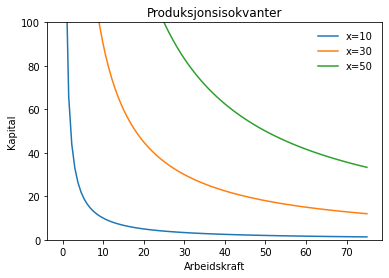

In [125]:
n=np.linspace(0.001,75, 100)


fig,ax=plt.subplots()
ax.set_xlabel('Arbeidskraft')
ax.set_ylabel('Kapital')

ax.plot(n,iso_fn(10,n), label='x=10')
ax.plot(n,iso_fn(30,n), label='x=30')
ax.plot(n,iso_fn(50,n), label='x=50')

ax.set_ylim([0, 100])

ax.legend(loc='upper right',frameon=False)
ax.set_title('Produksjonsisokvanter')

plt.show()

In [126]:
sp.symbols("\lambda", real=True, positive=True)

\lambda

In [127]:
lmda, w, r=sp.symbols("\lambda w r")# Lagrange multiplikator og faktorpriser

Målet er å minimere $w N + r K$ for en gitt produksjon $X$ gitt produktfunksjon $x=K^{0.5} N^{0.5}$ med hensyn til $K$ og $N$. Lagrange er da $L=w N +r K - \lambda (K^{0.5} N^{0.5}-X)$

In [128]:
L=w*N + r*K-lmda*(x(N,K)-X)#Kostnadsmin

In [129]:
dL_K=sp.diff(L,K)
dL_N=sp.diff(L,N)
display(dL_K)
display(dL_N)

-0.5*N**0.5*\lambda/K**0.5 + r

-0.5*K**0.5*\lambda/N**0.5 + w

Disse to likninger er førsteordensbetingelser som er begge lik 0. Deler vi den ene på den andre kan vi regne oss frem til en optimal løsning. Hver av disse elementer kan kalles som arg i ei liste. For å finne plassen i listen kan du bruke "display (dL_K.args)" og "display (dL_N.args)":

In [130]:
display (dL_K.args)
display (dL_N.args)

(r, -0.5*N**0.5*\lambda/K**0.5)

(w, -0.5*K**0.5*\lambda/N**0.5)

In [131]:
display(dL_N.args[0]/dL_K.args[0])
display(dL_N.args[1]/dL_K.args[1])

w/r

1.0*K**1.0/N**1.0

Da har vi $\frac{K}{N}=\frac{w}{r}$ og dermed har vi vist at en optimal løsning tilfredsstiller $K=\frac{w}{r}N$ som er substitumalen.

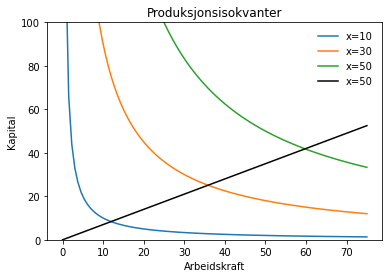

In [132]:
def substitumal(w,r,N):
    return N*w/r
ax.plot(n,substitumal(350,500,n),  color='black', label='x=50')
ax.legend(loc='upper right',frameon=False)
fig


Tegne inn isokostnadskurver. For et pengebeløp M vil isokostnadsfunksjon være: $M=wN+rK$. For å tegne dette i figuren må vi få K på venstresiden: $K=\frac{M}{r}-\frac{wN}{r}$. Optimal kombinasjon av K og N for å produsere x=10 løser $10=N^{0.5}K^{0.5}$ og $K=\frac{w}{r}N$.

In [133]:
løsn_10=sp.solve([N**(0.5)*K**(0.5)-10, K-(350/500)*N], K,N)
løsn_10

[(8.36660026534076, 11.9522860933439)]

Dette er optimal mengde Arbeidskraft og Kapital for å produsere 10 enheter. Vi kan gjøre det samme for et vilkårlig produksjonsnivå Z:

In [134]:
Z=sp.symbols('Z')
løsn_Z=sp.solve([N**(0.5)*K**(0.5)-Z, K-(350/500)*N], K,N)
løsn_Z

[(0.836660026534076*Z, 1.19522860933439*Z)]

Dette er den optimale tilpasningen for å produsere Z enheter: $K=0.8367Z, N=1.1952Z$. Dermed kan vi beregne kostnaden for å produsere Z enheter:

In [135]:
def mon_Z(Z):
    return 500*0.8367*Z+350*1.1952*Z
mon_Z(Z)

836.67*Z

In [136]:
# Sett inn i uttrykket for isokost
def isokost(Z,N):
    return mon_Z(Z)/500 -(350/500)*N
isokost(Z,N)

-0.7*N + 1.67334*Z

Da er isokostandslinjen for å produsere Z enheter gitt ved $K=1.67334Z-0.7N$. For eksempel for Z=10:

In [137]:
isokost(10,N)

16.7334 - 0.7*N

Vi tegner for Z=10,30,50:

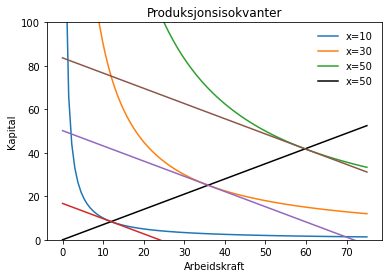

In [138]:
ax.plot(n,isokost(10,n))
ax.plot(n,isokost(30,n))
ax.plot(n,isokost(50,n))
fig

Vi ser at isokostnaden krysser substitumalen i akkurat tangeringspunktet til isokvanten, og vi har dermed funnet en kostnadsminimerende løsning.

### deloppgave d)

Vi har beregnet faktorkostnaden som `mon_Z(Z)` som en funkjson av produsert mengde. Da kan vi enkelt lage en funksjon av den totale kostnaden ved å plusse på den faste kostnaden.

In [139]:
def total_kost(Z):
    return mon_Z(Z)+10000
total_kost(Z)

836.67*Z + 10000

Som er en rett linje!

In [140]:
# total gjennomsnittskostnaden
def tot_AClang(Z):
    return total_kost(Z)/Z
tot_AClang(Z)

(836.67*Z + 10000)/Z

Plotte med total AC på kort sikt:

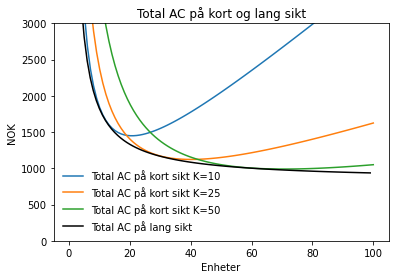

In [141]:
plt.plot(x_num,AC_tot(x_num,10), label='Total AC på kort sikt K=10')
plt.plot(x_num,AC_tot(x_num,25), label='Total AC på kort sikt K=25')
plt.plot(x_num,AC_tot(x_num,50), label='Total AC på kort sikt K=50')

plt.plot(tot_AClang(x_num), color='black', label='Total AC på lang sikt')

plt.legend (loc='lower left', frameon=False)
plt.xlabel('Enheter')
plt.ylabel('NOK')


plt.ylim(0,3000)
plt.title('Total AC på kort og lang sikt')         

plt.show()

Legg merke til at AC kurvene på kort sikt tangerer AC på lang sikt i ett punkt. På dette punktet er kapitalmengden tilgjengelig på kort sikt **nøyaktig** det som er optimalt på lang sikt for den produserte mengden. Legg merke til at AC på kort sikt ellers ligger over den på lang sikt. Tenk på hva bedriften kan gjøre på lang sikt (men ikke kort) for å finne forklaringen!